### Raghavendra Deshmukh - 8854506

# Lab 2


### Part A 
Use the Lab2 dataset provided. Load the dataset and split it into test and train. After that, train the model using Gaussian and Multinominal classifiers and post which model performs better. Use the trained model to perform some predictions on test data.

In [23]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset 
sample_df = pd.read_csv("Lab2_dataset.csv")
sample_df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
5,2949,ham,Subject: ehronline web address change\nthis me...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\nwe agr...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [3]:
# empty rows checking
blank_records = sample_df.isnull().sum()
blank_records

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [4]:
X_text = sample_df["text"]
y = sample_df["label_num"]

CountVectorizer in Python is a feature extraction technique used for detecting spam or not spam in text data. It converts the text into a numerical representation by counting the occurrence of each word. It creates a document-term matrix where rows represent documents and columns represent unique words. This matrix can then be used as input for machine learning algorithms to classify emails or messages as spam or not spam based on the presence and frequency of certain words. CountVectorizer simplifies the process of transforming text data into a format suitable for spam detection models.

In [5]:
# Create an instance of CountVectorizer
vectorizer_instance = CountVectorizer()

# Fit and transform the text data
X = vectorizer_instance.fit_transform(X_text)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [7]:
# Create a Gaussian Naive Bayes classifier
Gaussian = GaussianNB()

In [8]:
# Fit the classifier to the training data
Gaussian.fit(X_train.toarray(), y_train)

GaussianNB()

In [9]:
print("Vocabulary: ", vectorizer_instance.vocabulary_)

Vocabulary:  {'subject': 43562, 'enron': 18719, 'methanol': 31036, 'meter': 31029, '988291': 4629, 'this': 44989, 'is': 26371, 'follow': 20850, 'up': 46831, 'to': 45370, 'the': 44867, 'note': 33215, 'gave': 21765, 'you': 49945, 'on': 33928, 'monday': 31723, '00': 0, 'preliminary': 36688, 'flow': 20739, 'data': 15288, 'provided': 37231, 'by': 10766, 'daren': 15231, 'please': 36059, 'override': 34492, 'pop': 36319, 'daily': 15133, 'volume': 47878, 'presently': 36753, 'zero': 50176, 'reflect': 38656, 'activity': 5144, 'can': 11042, 'obtain': 33556, 'from': 21287, 'gas': 21710, 'control': 13942, 'change': 11911, 'needed': 32621, 'asap': 7247, 'for': 20911, 'economics': 17898, 'purposes': 37475, 'hpl': 24486, 'nom': 33090, 'january': 26665, '2001': 1116, 'see': 40993, 'attached': 7532, 'file': 20379, 'hplnol': 24493, '09': 214, 'xls': 49536, 'neon': 32688, 'retreat': 39309, 'ho': 24143, 'we': 48345, 're': 38305, 'around': 7143, 'that': 44859, 'most': 31923, 'wonderful': 49010, 'time': 45197

In [10]:
print(X_test.toarray())
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64


In [11]:
# Predict the labels for the test data
y_pred = Gaussian.predict(X_test.toarray())

In [12]:
# Calculate the accuracy of the classifier
model_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", model_accuracy)

Accuracy of the model: 0.961352657004831


### By using Multinominal lets check

In [13]:
# Create a Multinomial Naive Bayes classifier
Multi_nominal = MultinomialNB()
# Fit the classifier to the training data
Multi_nominal.fit(X_train.toarray(), y_train)

MultinomialNB()

In [14]:
# Predict the labels for the test data
Multi_nominal_Ypred = Multi_nominal.predict(X_test)

In [15]:
print(Multi_nominal_Ypred)

[0 0 1 ... 1 0 0]


In [17]:
# Calculate the accuracy of the classifier
Multi_nominal_Accuracy = accuracy_score(y_test, Multi_nominal_Ypred)
print("Accuracy of the Multinominal model:", Multi_nominal_Accuracy)

Accuracy of the Multinominal model: 0.9835748792270531


After evaluating the dataset using both Gaussian and Multinomial classifiers, we found that their accuracies were nearly identical. However, the Multinomial classifier exhibited a slightly higher score compared to the Gaussian classifier. The Gaussian classifier achieved an accuracy score of 0.9545893719806763, whereas the Multinomial classifier achieved a score of 0.978743961352657.

### Part B <br>
Use this air bnb new york city dataset and remove outliers based on price per night for a given apartment/home. You can demonstrate why using other techniques like mean/median/ percentile works. The task is to come up with a clean dataset that does not have outliers showcasing all the possibilities.

In [18]:
# Load the dataset
Airbnb_df = pd.read_csv("AB_NYC_2019.csv") 
Airbnb_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [19]:
# Count the number of blank rows in each column
blank_records = Airbnb_df.isna().count
duplicateRows = Airbnb_df[Airbnb_df.duplicated()]
print(blank_records)
print(duplicateRows)

<bound method DataFrame.count of           id   name  host_id  host_name  neighbourhood_group  neighbourhood   
0      False  False    False      False                False          False  \
1      False  False    False      False                False          False   
2      False  False    False      False                False          False   
3      False  False    False      False                False          False   
4      False  False    False      False                False          False   
...      ...    ...      ...        ...                  ...            ...   
48890  False  False    False      False                False          False   
48891  False  False    False      False                False          False   
48892  False  False    False      False                False          False   
48893  False  False    False      False                False          False   
48894  False  False    False      False                False          False   

       latitude  l

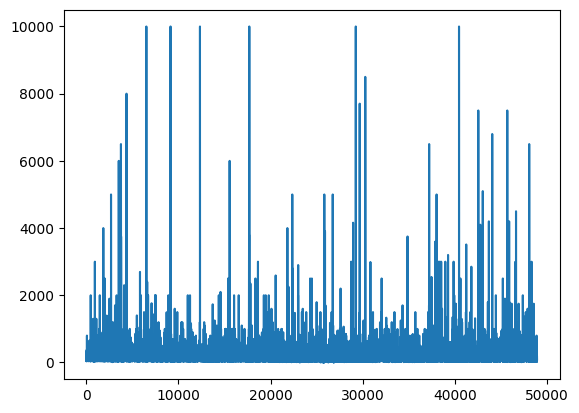

In [20]:
import matplotlib.pyplot as plt

plt.plot(Airbnb_df['price']) 

In [21]:
Airbnb_df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

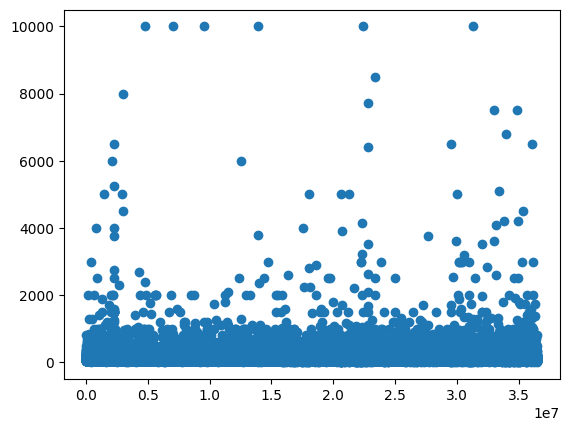

In [22]:
plt.scatter(x=Airbnb_df['id'], y=Airbnb_df['price'])

IQR, or Interquartile Range, is a statistical measure used to describe the spread or variability of a dataset. It is particularly useful in identifying and analyzing outliers.

The process of calculating the IQR involves the following steps:

Sort the dataset: Arrange the data points in ascending order.

Find the first quartile (Q1): Identify the value below which 25% of the data falls. This corresponds to the 25th percentile. You can use the formula Q1 = (n + 1) * 0.25, where n is the number of data points. If n is not an integer, interpolate the values.

Find the third quartile (Q3): Identify the value below which 75% of the data falls. This corresponds to the 75th percentile. Use the formula Q3 = (n + 1) * 0.75 to calculate Q3.

Calculate the IQR: Subtract Q1 from Q3 to obtain the interquartile range. The formula is IQR = Q3 - Q1.

In [25]:

# Calculate the IQR
q1 = np.percentile(Airbnb_df['price'], 25)
q3 = np.percentile(Airbnb_df['price'], 75)
iqr = q3 - q1

In [26]:


Lower_Bound = max(min(Airbnb_df['price']),(q1 - (1.5*iqr)))
Upper_Bound = q3 + (1.5*iqr)
print(Lower_Bound)
print(Upper_Bound)

0
334.0


In [30]:
# Identify outliers
outliers = Airbnb_df[(Airbnb_df['price'] < Lower_Bound) | (Airbnb_df['price'] > Upper_Bound)]

# Print the outliers
print("Outliers:", outliers[['id','price']])

# List of ids to delete
outlier_Ids = list(outliers['id'])

Outliers:              id  price
61        15396    375
85        19601    800
103       23686    500
114       26933    350
121       27659    400
...         ...    ...
48758  36420289    350
48833  36450896    475
48839  36452721    800
48842  36453160    350
48856  36457700    345

[2972 rows x 2 columns]


In [31]:
# Delete rows based on outliers list
filtered_df = Airbnb_df[~Airbnb_df['id'].isin(outlier_Ids)]
len(filtered_df)

45923

In [32]:

price_mean = filtered_df['price'].mean()
price_median = filtered_df['price'].median()
print(price_mean)
print(price_median)
print(min(filtered_df["price"]))
print(max(filtered_df["price"]))

119.97031988328288
100.0
0
334


In [33]:
#filtered dataset's info
filtered_df['price'].describe()

count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64